In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Nx=int(1000)  # num. meshes
imax=int(1000)   # max step to iterate
tol=float(1e-5)   # error tolerence. something like 1e-5

In [3]:
# Setup arrays. 
x=np.arange(0,Nx+1)  # x-array
u=0.0*x              # u-array, the potential
resid=0.0*x

In [4]:
# Jacobi spectral radius
rjac=np.cos(np.pi/Nx)

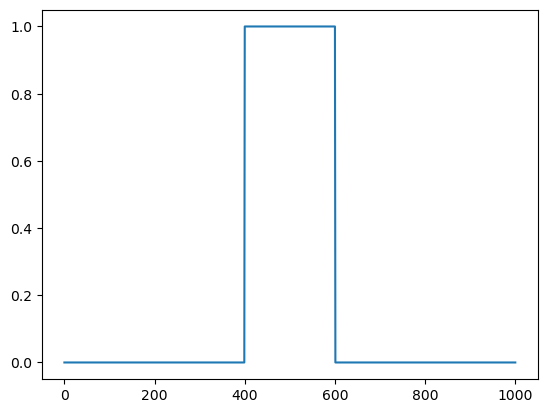

In [5]:
# rectangular function for the charge density. Used two Heaviside step func.
s=np.heaviside(x/Nx-0.4,1)*np.heaviside(0.6-x/Nx,1)
plt.plot(x,s);  plt.show()

In [6]:
# initial error 
errf=sum(np.fabs(s))
err= errf  # initial error

In [7]:
# Coefficients
a=1.0
b=1.0
c=-2.0

In [8]:
# initial overrelaxation factor 
omega=1

In [9]:
i=0
while err > (tol*errf) and i<imax: 
      # even calculation
	resid[1:-1:2] = a*u[2::2] +b*u[0:-2:2] + c*u[1:-1:2] - s[1:-1:2]
	u[1:-1:2] -= omega*resid[1:-1:2]/c
	err=sum(np.fabs(resid))
	omega=1/(1-0.5*rjac**2) if i==1 else 1/(1-0.25*rjac**2*omega)

      # odd calculation
	resid[2:-1:2] = a*u[3::2]+b*u[1:-2:2]+c*u[2:-1:2] - s[2:-1:2]
	u[2:-1:2] -= omega*resid[2:-1:2]/c
	err +=sum(np.fabs(resid))
	omega = 1/(1-0.25*rjac**2*omega)

	i+=1


Number of iteration= 1000
Relative Error= 6.329880076838052


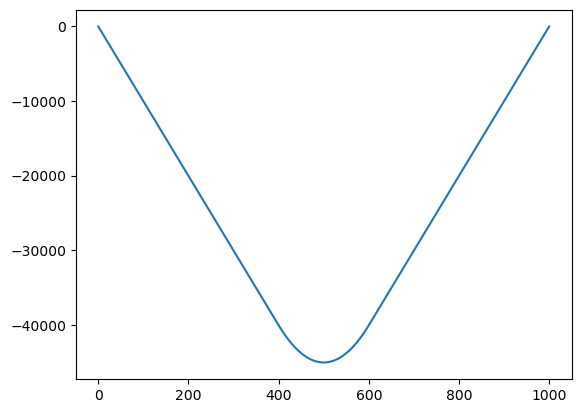

In [10]:
print("Number of iteration=",i)
print("Relative Error=",err/errf)
plt.plot(x,u);  plt.show()
